In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


A1 = 0.0131190271681495
A2 = [0.25614871 0.21530993 0.14803593 0.08853512 0.04870505 0.02558638
 0.01311903]
A3 = 0.7361244423731081


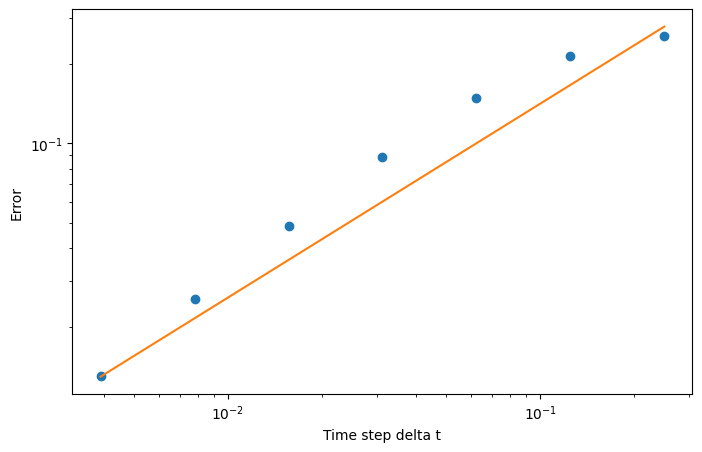

In [2]:
# Question 1
# part a -- Forward Euler

# define delta t values
del_t = [2**-2, 2**-3, 2**-4, 2**-5, 2**-6, 2**-7, 2**-8]
   

# given ODE
f = lambda t, y: -3 * y * np.sin(t)

# given solution
y_true = lambda t: (np.pi / np.sqrt(2)) * np.exp(3 * (np.cos(t) -1))

# given initial condition
y_0 = np.pi / np.sqrt(2)

# set up loop over time steps
A2 = np.array([])
for i in del_t:
    dt = i
    t = np.arange(0, 5 + dt, dt)
    y = np.zeros(len(t))
    
    # implement FE and calculate error
    for n in range(0, len(t) - 1):
        y[0] = y_0
        y[n + 1] = y[n] + dt * f(t[n], y[n])
    E = abs(y_true(t[-1]) - y[-1])
    # print('time step: ' + str(i))
    # print(E)    
    A2 = np.append(A2,E)
    # print('')
    
    if i == 2**-8:
        A1 = E
        
        
    # break

fig, ax = plt.subplots(1,1, figsize = (8,5))
fig = plt.loglog(del_t, A2, 'o')
ax.set_ylabel('Error')
ax.set_xlabel('Time step delta t')
a, b = np.polyfit(np.log(del_t), np.log(A2), 1)
A3 = a
print('A1 = ' + str(A1))
print('A2 = ' + str(A2))
print('A3 = ' + str(A3))

plt.loglog((del_t), 0.77 * del_t**a)

A4 = 7.932937287791209e-06
A5 = [1.21346579e-01 1.74578494e-02 3.11772445e-03 6.33124352e-04
 1.40311174e-04 3.28452275e-05 7.93293729e-06]
A6 = 2.2958750230899834


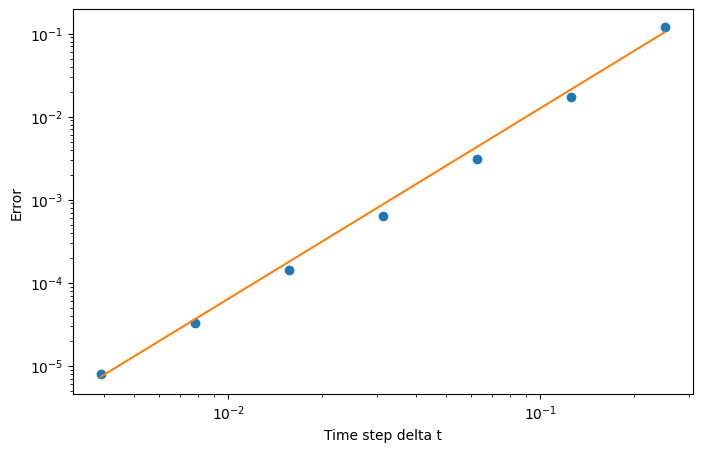

In [3]:
# Question 1
# part b -- Heuns

# set up loop over time steps
A5 = np.array([])
for i in del_t:
    dt = i
    t = np.arange(0, 5 + dt, dt)
    y = np.zeros(len(t))
    
    # implement Heuns and calculate error
    for n in range(0, len(t) - 1):
        y[0] = y_0
        y[n + 1] = y[n] + [(dt/2) * (f(t[n],y[n]) + f(t[n+1], y[n] + dt*f(t[n],y[n])))]
    E = abs(y_true(t[-1]) - y[-1])
    A5 = np.append(A5,E)
    if i == 2**-8:
        A4 = E

    # break
    
fig, ax = plt.subplots(1,1, figsize = (8,5))
fig = plt.loglog(del_t, A5, 'o')
ax.set_ylabel('Error')
ax.set_xlabel('Time step delta t')
a, b = np.polyfit(np.log(del_t), np.log(A5), 1)
A6 = a
print('A4 = ' + str(A4))
print('A5 = ' + str(A5))
print('A6 = ' + str(A6))

plt.loglog((del_t), 2.5 * del_t**a)

A4 = 1.4896184730162076e-08
A5 = [3.00030405e-02 9.89117580e-03 8.75975041e-04 5.94263269e-05
 3.78964043e-06 2.38041224e-07 1.48961847e-08]
A6 = 3.6201133627805024


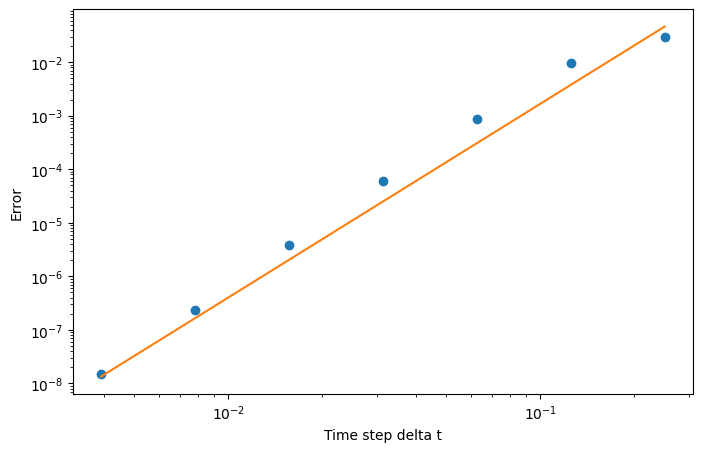

In [4]:
# Question 1
# part c -- Adams predictor-corrector

# set up loop over time steps
A8 = np.array([])
for i in del_t:
    dt = i
    t = np.arange(0, 5 + dt, dt)
    y = np.zeros(len(t))
    y_predicted = np.zeros(len(t))
    y[0] = (np.pi)/np.sqrt(2)
    
    # implement FE and calculate error
    for n in range(0, len(t) - 1):
        y[0] = y_0
        
        y[1] = y[0] + dt * f(t[0] + dt/2, y[0] + dt/2*f(t[0],y[0]))
        
        y_predicted[n + 1] = y[n] + (dt/2) * (3 * f(t[n], y[n]) - f(t[n-1], y[n-1]))
        y[n+1] = y[n] + (dt/2) * (f(t[n+1], y_predicted[n+1]) + f(t[n],y[n]))
        
    E = abs(y_true(t[5]) - y[5])
    A8 = np.append(A8, E)

    if i == 2**-8:
        A7 = E
    # break
    
    
    
fig, ax = plt.subplots(1,1, figsize = (8,5))
fig = plt.loglog(del_t, A8, 'o')
ax.set_ylabel('Error')
ax.set_xlabel('Time step delta t')
a, b = np.polyfit(np.log(del_t), np.log(A8), 1)
A9 = a
print('A4 = ' + str(A7))
print('A5 = ' + str(A8))
print('A6 = ' + str(A9))

plt.loglog((del_t), 7 * del_t**a)

In [5]:
# Question 2
# Part a

# define oscillator

def vanderpol(t, z):
    x, y = z
    return [y, epsilon * y * (1 - x**2) - x]

# define time endpoints
a, b = 0, 32

# define time step
dt = 0.5

# define range of time steps 
t = np.arange(0, 32 + dt, dt)

# set epsilon value
epsilon = 0.1

#solve
sol = solve_ivp(
    fun = vanderpol, 
    t_span = [a, b], 
    y0 = [np.sqrt(3), 1],
    t_eval = t
)

p = sol.y[0].reshape((-1, 1))

epsilon = 1

sol = solve_ivp(
    fun = vanderpol, 
    t_span = [a, b], 
    y0 = [np.sqrt(3), 1],
    t_eval = t
)

q = sol.y[0].reshape((-1, 1))


epsilon = 20

sol = solve_ivp(
    fun = vanderpol, 
    t_span = [a, b], 
    y0 = [np.sqrt(3), 1],
    t_eval = t
)

r = sol.y[0].reshape((-1, 1))

A10 = np.concatenate([p, q, r], axis = 1)
print(A10)
# A11 = np.array([])
# for epsilon in epsilons:
#     eps = epsilon
#     # print('epsilon = ' + str(eps))
#     sol = solve_ivp(
#         fun = vanderpol, 
#         t_span = [a, b], 
#         y0 = [np.sqrt(3), 0],
#         t_eval = t
#     )
#     print(A11)
#     print(A11.shape)
#     print(A11.reshape(-1,1).shape)
#     print('epsilon = ' + str(eps))
#     # print(sol.y[0].shape)
#     sol.y[0].reshape((-1, 1))
#     A11 = np.concatenate([A11, sol.y[0]], axis = 0)
#     # f = np.transpose(sol.y[0])
#     # print(f.shape)
#     print('')

# print(A11.T)

[[ 1.73205081  1.73205081  1.73205081]
 [ 1.98072797  1.86913821  1.73627917]
 [ 1.74251197  1.63697972  1.71448798]
 [ 1.11520536  1.24640437  1.69212157]
 [ 0.22205224  0.6620052   1.66912897]
 [-0.76320749 -0.29751661  1.64544762]
 [-1.57836676 -1.54461291  1.6210078 ]
 [-1.96970127 -2.00660693  1.59572538]
 [-1.85901031 -1.86222552  1.5694964 ]
 [-1.32627273 -1.54157577  1.5422    ]
 [-0.49084197 -1.08808883  1.51367561]
 [ 0.49396329 -0.39900886  1.48373021]
 [ 1.38765201  0.72887391  1.4521066 ]
 [ 1.91495509  1.82139049  1.41846429]
 [ 1.94421088  1.99114079  1.38232892]
 [ 1.51958126  1.76544458  1.34299483]
 [ 0.75647575  1.40275687  1.29937221]
 [-0.20807599  0.88671153  1.24953951]
 [-1.15995258  0.06639617  1.18969178]
 [-1.81828363 -1.18607073  1.10982492]
 [-1.99070744 -1.96935507  0.96238939]
 [-1.68217768 -1.94102547 -1.99072323]
 [-0.99959598 -1.6615676  -1.99432373]
 [-0.07235021 -1.25669776 -1.97746648]
 [ 0.91222685 -0.66498388 -1.96036334]
 [ 1.68043777  0.30321273

In [6]:
# Question 2
# Part b

epsilon = 1
tolerance_list = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
method_list = ['RK45', 'RK23', 'BDF']

for method in method_list
selected_method = method
    L = np.array([])
    M = np.array([])
    for tolerance in tolerance_list:
        tolerance_value = tolerance
        sol = solve_ivp(
            fun = vanderpol, 
            t_span = [a, b], 
            y0 = [2, np.pi**2], 
            atol = tolerance_value, 
            rtol = tolerance_value, 
            method = selected_method
        )
        T = sol.t
        print('tolerance = ' + str(tolerance_value) + 
              ', method = ' + selected_method + ', mean time step = ' + 
              str(np.mean(np.diff(T))))



        L = np.append(L, tolerance_value)
        M = np.append(M, np.mean(np.diff(T)))
        print(L)
        print(M)
    fig, ax = plt.subplots(1,1, figsize = (8,5))
    plt.loglog(L,  M, 'o')
    plt.suptitle(selected_method)
    ax.set_ylabel('Error')
    ax.set_xlabel('Average delta T')
    print(L)
    print(M)
    a, b = np.polyfit(np.log(L), np.log(M), 1)
    plt.loglog((L), 0.77 * L**a)
    plt.show()


SyntaxError: expected ':' (3795328446.py, line 8)